# <h1 align="center"> Runge kutta Explícito </h1>
#  <h1 align="center"> de tercer orden </h1>

## Dada la EDO con condiciones de Cauchy  
\begin{align*}
y' &= f(t, y) \\
y(t_0) &= y_0
\end{align*}
## La solución numérica de y(t) se calcula mediante
\begin{align*}
k1 &= f(t_{i-1}, y_{i-1}) \\
k2 &= f(t_{i-1} + h, y_{i-1} + h*k1) \\
k3 &= f\left(t_{i-1} + \frac{h}{2}, y_{i-1} + \frac{h}{2}*\frac{k1 + k2}{2}\right) \\
y_i &= y_{i-1} + \frac{h}{6}(k1 + k2 + 4*k3) \\
\end{align*}
## con *h* el tamaño de paso, e $i = 1,2, … , n$


----
Referencias:
* Corless & Fillion (2013). A Graduate Introduction to Numerical Methods, Springer. pág. 617

---

Autor: Roberto Méndez Méndez

Editado: 29 Aug 24   v3

### Caso 1) Solución númerica de la EDO

\begin{equation}
\frac{dy}{dt} = -cy
\end{equation}
### Dado que f(t,y) = -cy, este RK toma la forma
\begin{align*}
k1 &= -c*y_{i-1} \\
k2 &= -c(y_{i-1} + h*k1) \\
k3 &= -c\left(y_{i-1} + h*\frac{k1 + k2}{4}\right) \\
y_i &= y_{i-1} + \frac{h}{6}(k1 + k2 + 4*k3) \\
\end{align*}

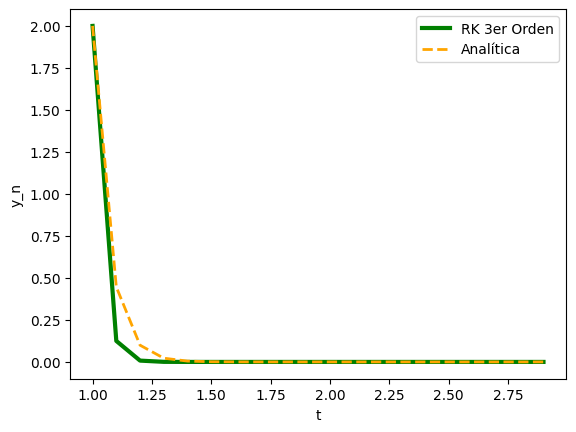

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 1
tf = 3
y0 = 2
c = 15
h = 0.1
t = np.arange(t0, tf, h)

y = np.zeros(len(t))
y[0] = y0

# Método númerico Runge-Kutta
for i in range(len(t) - 1):
    k1 = -c*y[i]
    k2 = -c*(y[i] + h*k1)
    k3 = -c*(y[i] + h*(k1 + k2)/4)
    y[i+1] = y[i] + h*(k1 + k2 + 4*k3)/6

# Solución analítica
solExac = y0*np.exp(c*t0)*np.exp(-c*t)


# Gráficas
plt.plot(t, y, 'green', linestyle="-", linewidth=3 )
plt.plot(t, solExac, 'orange', linestyle="--", linewidth=2)
plt.xlabel('t')
plt.ylabel('y_n')
plt.legend(['RK 3er Orden', 'Analítica'] )
plt.show()

### Caso 2) Solución númerica de la EDO Logistica

In1838,Pierre-Francois
Verhulst argued that the growth rate should depend on the population
level, which implicitly as sumes dependence on resource.If the population is low the rate of growth is positive and if it is high the rate is
negative.Verhulst proposed the differential equation, which he termed
the logistic equation,

\begin{align*}
\frac{dy}{dt} &= ry\left(1 - \frac{y}{K}\right) \\
y(t_0) &= y_0
\end{align*}

donde $K > 0$ es "carrying capacity" y $r > 0$ "growth rate", ambas constantes. <br>
La solución analítica de esta EDO es
\begin{equation*}
y(t) = \frac{K*y_0}{y_0 + (K - y_0)*e^{r(t_0 - t)}}
\end{equation*}
### Entonces, para la sustitución numérica
\begin{align*}
f(t,y) &= ry\left(1 - \frac{y}{K}\right),\\
t0 &= t_0 \hspace{.7cm} \\
y0 &= y_0
\end{align*}
 por lo tanto en este caso el método RK toma la forma
\begin{align*}
k1 &= r*y_{i-1}\left(1 - \frac{y_{i-1}}{k}\right) \\
k2 &= r*[y_{i-1} + h*k1]*\left(1 - \frac{y_{i-1} + h*k1}{k}\right) \\
k3 &= r*\left(y_{i-1} + h*\frac{k1 + k2}{4}\right)*\left(1 - \frac{1}{K}\left[y_{i-1} + h*\frac{k1 + k2}{4}\right]\right)  \\
y_i &= y_{i-1} + \frac{h}{6}(k1 + k2 + 4*k3) \\
\end{align*}

---

Referencias:

* Mathematical Modeling the Life Sciences Numeric Python y Matlab  2023 Cogan
 pág. 53.  Texto histórico
* Mathematical Analysis of Infectious Diseases 2022 ed  Agarwal Nieto pág. 5 solución analítica logística
* Solving Ordinary Differential Equations in Python  2024 Sundnes pag 9

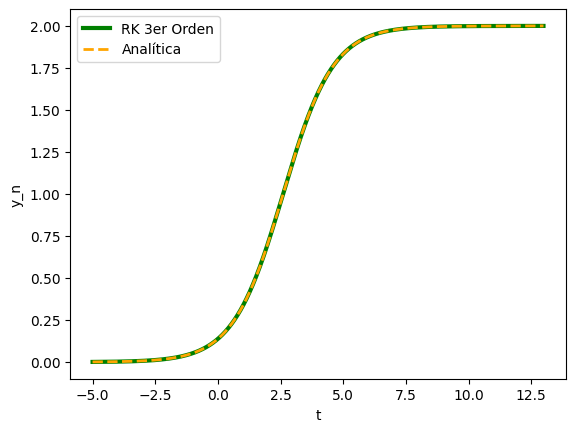

In [2]:
import numpy as np
import matplotlib.pyplot as plt

K=2
r=1
t0 = -5
tf = 13
y0 = 0.001
h = 0.01
t = np.arange(t0, tf, h)

y = np.zeros(len(t))
y[0] = y0

# Método númerico Runge-Kutta
for i in range(len(t) - 1):
    k1 = r*y[i]*(1 - y[i]/K)
    k2 = r*(y[i] + h*k1)*(1 - (y[i] + h*k1)/K)
    k3 = r*(y[i] + h*(k1 + k2)/4)*(1 - (y[i] + h*(k1 + k2)/4)/K)
    y[i+1] = y[i] + h*(k1 + k2 + 4*k3)/6

# Solución analítica
solExac = K*y0/(y0 + (K - y0)*np.exp(r*(t0 - t)))


# Gráficas
plt.plot(t, y, 'green', linestyle="-", linewidth=3 )
plt.plot(t, solExac, 'orange', linestyle="--", linewidth=2)
plt.xlabel('t')
plt.ylabel('y_n')
plt.legend(['RK 3er Orden', 'Analítica'] )
plt.show()

## Actividad:
Prueba el método RK de la logística con los siguientes valores

* K=2 r=1 t0 = -5 tf = 13 y0 = 0.001 h = 0.01
* K=1 r=1 t0 = -1 tf = 4 y0 = 0.1  h = 0.1
* K=2 r=3 t0 = -1 tf = 4 y0 = 0.1  h = 0.1
* K=1 r=1 t0 = 1 tf = 2 y0 = -0.5 h = 0.01
* K=1 r=1 t0 = 1 tf = 3 y0 = -0.5 h = 0.01
* K=1 r=2 t0 = -4 tf = 3 y0 = 4  h = 0.1

Explica que conducta observas según los cambios en los parámetros
y si falla el calculo da una posible explicación.